mobile game ab_test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
from scipy.stats import shapiro, mannwhitneyu, kstest

In [3]:
df = pd.read_csv('cookie_cats1.csv')

In [4]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [97]:
group_A = df[df['version']== 'gate_30']
group_B = df[df['version'] == 'gate_40']

In [64]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [65]:
print(df.userid.nunique() == df.shape[0])

True


In [66]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]]

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
1%,0.000000
5%,1.000000
10%,1.000000
20%,3.000000
50%,16.000000
80%,67.000000


In [67]:
df.groupby(['version'])[['sum_gamerounds']].agg(['mean', 'count', 'median'])

sum_gamerounds              
                  mean  count median
version                             
gate_30      52.456264  44700   17.0
gate_40      51.298776  45489   16.0

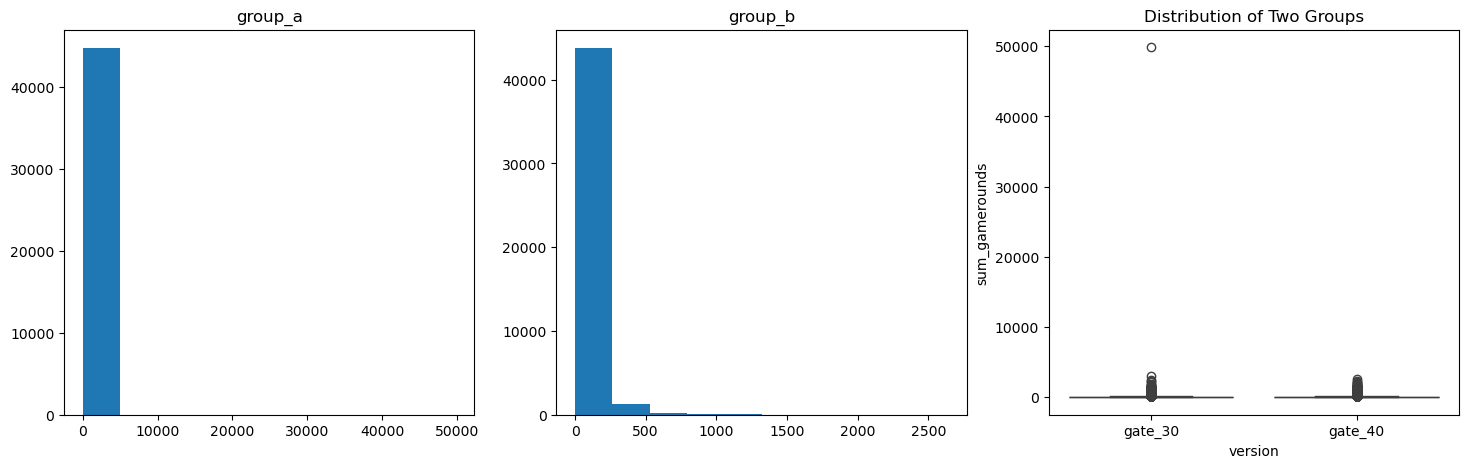

In [68]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
axes[0].set_title('group_a')
axes[0].hist(group_A['sum_gamerounds'])
axes[1].set_title('group_b')
axes[1].hist(group_B['sum_gamerounds'])
axes[2].set_title("Distribution of Two Groups")
sns.boxplot(x = df.version, y = df.sum_gamerounds, ax = axes[2])
plt.show()

In [83]:
#чистим тот большой выброс на boxplot
group_A = group_A[group_A['sum_gamerounds'] < group_A['sum_gamerounds'].max()]

In [93]:
group_A['sum_gamerounds'].mean()

51.27701463152714

In [84]:
statistic, p_value = kstest(group_A['sum_gamerounds'], 'norm')
#h0 distr is norm
#h1 dist is not norm
statistic, p_value

(0.8724129625974381, 0.0)

In [85]:
statistic, p_value = kstest(group_B['sum_gamerounds'], 'norm')
statistic, p_value

(0.8707186187388001, 0.0)

In [86]:
stat, p_value = mannwhitneyu(group_A['sum_gamerounds'],group_B['sum_gamerounds'])

In [87]:
stat,p_value

(1024240272.5, 0.05158207970577983)

In [88]:
summary = {
    'mean_groupA' : group_A['sum_gamerounds'].mean(),
    'mean_groupB' : group_B['sum_gamerounds'].mean(),
    'p_value' : p_value
}

In [89]:
summary_df = pd.Series(summary)

In [91]:
summary_df

mean_groupA    51.277015
mean_groupB    51.298776
p_value         0.051582
dtype: float64

In [94]:
p_value > 0.05 
#'по сумме пройденных раундов, разница у двух групп не имеет статистической занимости. будем дальше искать разницу в retention'

True

In [106]:
group_A[group_A['retention_7'] == True].count()

userid            8502
version           8502
sum_gamerounds    8502
retention_1       8502
retention_7       8502
dtype: int64

In [107]:
group_B[group_B['retention_7'] == True].count()

userid            8279
version           8279
sum_gamerounds    8279
retention_1       8279
retention_7       8279
dtype: int64

In [120]:
group_A = group_A.replace({True:1, False:0})

C:\Users\Win10\AppData\Local\Temp\ipykernel_14772\3258464074.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group_A = group_A.replace({True:1, False:0})


In [122]:
group_B = group_B.replace({True:1, False:0})

C:\Users\Win10\AppData\Local\Temp\ipykernel_14772\3441507336.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group_B = group_B.replace({True:1, False:0})


In [140]:
group_A['retention_7'].sum()

8502

In [141]:
group_B['retention_7'].sum()

8279

In [137]:
stat, p_value = mannwhitneyu(group_A['retention_7'], group_B['retention_7'])
p_value

0.001554344685704005

In [143]:
p_value < 0.05
#так как p_value меньше 0.05 можем заявить, что разница в retention_7, 
#является статистически значимой. И контрольная группа показала результат выше,
#следовательно нет необходимоти в переносе гейта на 40 лвл.

True